<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;">
<b>
<span style='color:skyblue'>IEEE FCIH SB Machine Learning season 2025 </span>
</b>
<div>
<span style='color:Salmon'>Convolution Neural Networks (CNN)</span>

</div>

</div>

<br>


# Building a CNN model for MNIST

In [8]:
# load minst dataset
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# print the shape of the dataset
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28), Training labels shape: (60000,)
Test data shape: (10000, 28, 28), Test labels shape: (10000,)


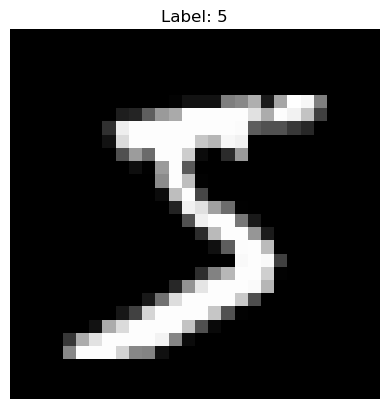

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Display the first image in the training set
plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.axis('off')
plt.show()

CNNs expect 4D input tensors:

* `Format: (number_of_samples, height, width, channels)`

* `x_train.shape[0]`: number of training samples (e.g., 60,000 for MNIST)

* `28, 28`: image height and width (MNIST digits are 28x28 pixels)

* `1`: number of color channels (1 for grayscale images)

> Before (60000, 28, 28) -> After (60000, 28, 28, 1) 
> This tells the CNN: “You have 60,000 grayscale images, each 28x28 pixels, with 1 channel.”

check the [doucmentation](https://keras.io/api/layers/convolution_layers/convolution2d/)
* If `data_format="channels_last"`: A 4D tensor with shape: (batch_size, height, width, channels) ✅ we are working with this 
* If `data_format="channels_first"`: A 4D tensor with shape: (batch_size, channels, height, width)


In [17]:
# Reshape the data to fit the CNN input requirements
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [18]:
print(f"Reshaped training data shape: {x_train.shape}")
print(f"Reshaped test data shape: {x_test.shape}")

Reshaped training data shape: (60000, 28, 28, 1)
Reshaped test data shape: (10000, 28, 28, 1)


In [19]:
# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
y_train # integer labels (use sparse_categorical_crossentropy)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

> The `Conv2D` layer creates a 2D convolution kernel that is applied to the input layer, commonly used for image data.

```python
tf.keras.layers.Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    activation=None,
    input_shape=None,
    ...
)

```
| Argument                 | Description                                                                                                            |
| ------------------------ | ---------------------------------------------------------------------------------------------------------------------- |
| **`filters`**            | *(int)* Number of output filters (i.e. the number of convolutional kernels). Determines the number of output channels. |
| **`kernel_size`**        | *(int or tuple)* Size of the convolution window (e.g., `3` or `(3, 3)`).                                               |
| **`strides`**            | *(int or tuple)* Step size for moving the filter. Default is `(1, 1)`.                                                 |
| **`padding`**            | *(str)* `'valid'` (no padding) or `'same'` (zero-padding to keep output size same as input).                           |
| **`activation`**         | *(str or function)* Activation function to apply (e.g., `'relu'`, `'sigmoid'`, etc.).                                  |
| **`input_shape`**        | *(tuple)* Only used in the first layer. Format: `(height, width, channels)` (exclude batch size).                      |




### Output Shape Calculation:

\[
$$ \text{Output size} = \left\lfloor \frac{W - F + 2P}{S} \right\rfloor + 1 $$
\]

where:  
- \( W \): input width (or height)  
- \( F \): filter (kernel) size  
- \( P \): padding size  
- \( S \): stride  


In [ ]:
# Building a CNN model for MNIST
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
cnn_model_minist = Sequential() 

# Add a convolutional layer with 32 filters, a kernel size of 3x3, and ReLU activation
cnn_model_minist.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Add a max pooling layer with a pool size of 2x2
cnn_model_minist.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolutional layer with 64 filters and a kernel size of 3x3
cnn_model_minist.add(Conv2D(64, (3, 3), activation='relu'))
# Add another max pooling layer with a pool size of 2x2
cnn_model_minist.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output from the convolutional layers
cnn_model_minist.add(Flatten())
# Add a fully connected layer with 128 units and ReLU activation
cnn_model_minist.add(Dense(128, activation='relu'))
# Add the output layer with 10 units (one for each digit) and softmax activation
cnn_model_minist.add(Dense(10, activation='softmax'))


| Layer                    | Input Shape        | Output Shape      | Calculation Details                                             | Number of Parameters       |
|--------------------------|--------------------|-------------------|----------------------------------------------------------------|----------------------------|
| Input reshape            | (60000, 28, 28)    | (60000, 28, 28, 1)| Added channel dimension (grayscale)                            | 0                          |
| Conv2D (32 filters, 3x3) | (28, 28, 1)        | (26, 26, 32)      | Output: floor((28 - 3 + 0)/1) + 1 = 26                         | (3*3*1)*32 + 32 = 320      |
| MaxPooling2D (2x2)        | (26, 26, 32)       | (13, 13, 32)      | Pool size 2x2, stride 2 (default)                              | 0                          |
| Conv2D (64 filters, 3x3) | (13, 13, 32)       | (11, 11, 64)      | Output: floor((13 - 3 + 0)/1) + 1 = 11                         | (3*3*32)*64 + 64 = 18,496  |
| MaxPooling2D (2x2)        | (11, 11, 64)       | (5, 5, 64)        | Pool size 2x2, stride 2 (default)                              | 0                          |
| Flatten                  | (5, 5, 64)         | (1600,)           | 5 * 5 * 64 = 1600                                              | 0                          |
| Dense (128 units)         | (1600,)            | (128,)            | 1600 * 128 + 128                                               | 204,928                    |
| Dense (10 units)          | (128,)             | (10,)             | 128 * 10 + 10                                                  | 1,290                      |
| **Total Parameters**      |                    |                   |                                                                | **225,034**                |


- Typically, deep learning frameworks use 32-bit floats (float32) for weights by default.
- 32 bits = 4 bytes per parameter.

$$
Total size (bytes)=Number of parameters×Bytes per parameter
=225,034×4=900,136 bytes

$$

* 1KB = 1024 bytes 
* 1MB = 1024 KB
$$
\frac{900,136}{1024} = 879.03 KB = 0.86 MB
$$


In [26]:
cnn_model_minist.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [28]:
# compile the model
cnn_model_minist.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
# train the model 
history_minist = cnn_model_minist.fit(x_train, y_train, epochs=10, batch_size=100, validation_data=(x_test, y_test),
callbacks=[
    # Early stopping to prevent overfitting
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    # Model checkpoint to save the best model
    tf.keras.callbacks.ModelCheckpoint('Models/cnn_model_minist.keras', save_best_only=True, monitor='val_loss'),
    # TensorBoard callback for visualization
    tf.keras.callbacks.TensorBoard(log_dir='logs/cnn_minist', histogram_freq=1),
    ]

)

Epoch 1/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0351 - val_accuracy: 0.9879
Epoch 2/10
600/600 [==============================] - 11s 19ms/step - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0392 - val_accuracy: 0.9885
Epoch 3/10
600/600 [==============================] - 11s 18ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0378 - val_accuracy: 0.9889
Epoch 4/10
600/600 [==============================] - 10s 17ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 5/10
600/600 [==============================] - 12s 19ms/step - loss: 0.0080 - accuracy: 0.9974 - val_loss: 0.0313 - val_accuracy: 0.9922
Epoch 6/10
600/600 [==============================] - 12s 20ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0311 - val_accuracy: 0.9915
Epoch 7/10
600/600 [==============================] - 13s 21ms/step - loss: 0.0062 - accuracy: 0.9980 - val_loss: 0.0309 - val_accuracy:

In [1]:
%reload_ext tensorboard
# open TensorBoard in the notebook
%tensorboard --logdir logs/cnn_minist

Reusing TensorBoard on port 6006 (pid 24272), started 18:50:50 ago. (Use '!kill 24272' to kill it.)

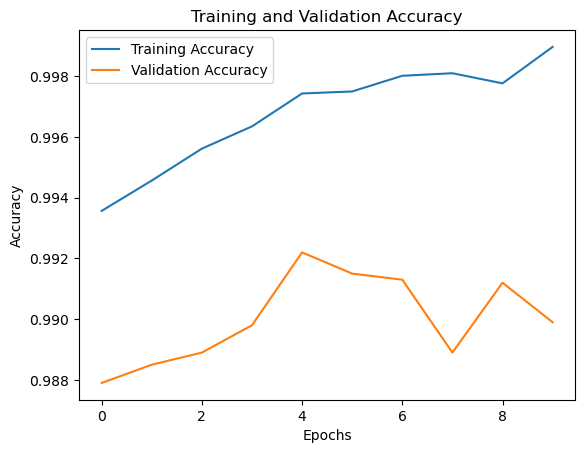

In [38]:
# plot the training and validation accuracy
plt.plot(history_minist.history['accuracy'], label='Training Accuracy')
plt.plot(history_minist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Data Augmentation 

> **Data augmentation** is a technique used to **artificially increase the size and diversity of a training dataset** by applying random (but realistic) transformations to the existing data. This helps improve the generalization of machine learning models, especially Convolutional Neural Networks (CNNs) for image tasks.
--------------------------------
### Why use Data Augmentation?
* Prevents overfitting by making the model see varied versions of the same image.
* Helps the model generalize better to unseen data.
* Useful when you have a limited dataset.
------------------------------
### Types of Augmentation Possible
| Augmentation Type     | Description                                      | Keras Parameter Name                      |
| --------------------- | ------------------------------------------------ | ----------------------------------------- |
| Rotation              | Rotate image by a certain degree range           | `rotation_range`                          |
| Width Shift           | Shift image horizontally by a fraction           | `width_shift_range`                       |
| Height Shift          | Shift image vertically by a fraction             | `height_shift_range`                      |
| Shear                 | Shear angle for affine transformation            | `shear_range`                             |
| Zoom                  | Randomly zoom in or out                          | `zoom_range`                              |
| Horizontal Flip       | Flip images left-right                           | `horizontal_flip=True`                    |
| Vertical Flip         | Flip images top-bottom (less common)             | `vertical_flip=True`                      |
| Channel Shift         | Shift the color channels randomly                | `channel_shift_range`                     |
| Brightness Adjustment | Change image brightness                          | `brightness_range=[min, max]`             |
| Fill Mode             | How to fill newly created pixels after transform | `fill_mode` ('nearest', 'constant', etc.) |




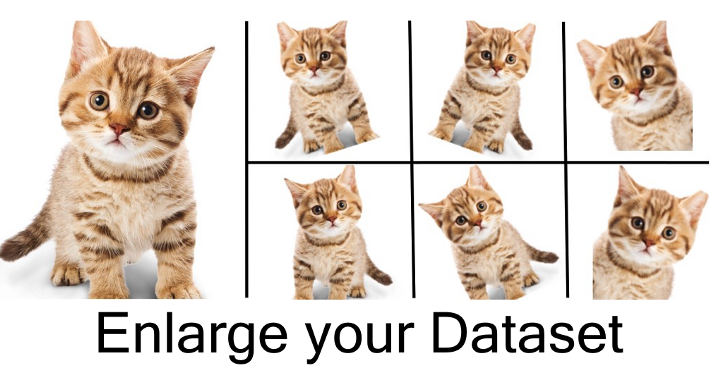

>**On-the-fly augmentation** refers to the process of generating augmented data during the training (dynamic) process of a machine learning model, rather than preparing it beforehand. This approach offers several advantages, including the ability to create variations of data that are tailored to the current mini-batch being processed and to avoid storing large augmented datasets. 


| Aspect                     | **On-the-Fly Augmentation**                                   | **Offline Augmentation**                                  |
| -------------------------- | ------------------------------------------------------------- | --------------------------------------------------------- |
| **When it happens**        | During training, at runtime (on-the-fly)                      | Before training, preprocessing data                       |
| **Data Storage**           | No need for extra disk space, augmentation happens in-memory  | Augmented data is stored on disk                          |
| **Training Time**          | Takes longer because of the extra computation during training | Faster since augmentation is pre-done                     |
| **Flexibility**            | Highly flexible, can change augmentation parameters easily    | Less flexible, requires reprocessing to change strategies |
| **Complexity**             | More complex since augmentation happens during training       | Easier to manage and debug since images are pre-augmented |

---------------
>On-the-fly augmentation is more flexible and efficient in terms of disk space but comes at the cost of slower training and potential complexity during debugging.

>Offline augmentation is faster during training and simpler to manage but requires more disk space and preprocessing time.




In [ ]:
# Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an ImageDataGenerator for on-the-fly augmentation
datagen = ImageDataGenerator(
    rotation_range=10,  # Randomly rotate images by up to 10 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20% of the total width
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20% of the total height
    zoom_range=0.2,  # Randomly zoom in or out on images by up to 20%
    horizontal_flip=False,  # This disables horizontal flipping 
    fill_mode='nearest'  # Fill in new pixels with the nearest pixel value
)


>Rotating digits like 6, 9, and other symmetric numbers (like 0, 3, 5) could cause confusion or lead to misinterpretations of the class.

>Flipping (especially horizontal flipping) could create mirror images of certain digits, which makes them look like completely different numbers (e.g., flipping a "3" can turn it into an "E").



> When you perform transformations (such as rotation, zoom, or shifting), **parts of the image may end up "outside" the original bounds** of the image, **leaving empty pixels** (like the corners when rotating). The fill_mode defines how these empty pixels should be filled.

Possible fill_mode Options:
* `nearest` : Fills empty pixels with the nearest pixel value.
* `constant` : Fills empty pixels with a constant color, specified by the `cval` parameter
* `reflect` : Fills empty pixels by reflecting the border pixels. 
* `wrap` : Fills empty pixels by wrapping around the image from the opposite side.


---------------------
`datagen.flow(X_train, y_train, batch_size=8)`: This will generate a batch of 8 augmented images (you can adjust the batch size).

`batch[0][i]`: Since datagen.flow() returns a tuple (augmented_images, labels), batch[0] contains the images, and batch[1] contains the labels.



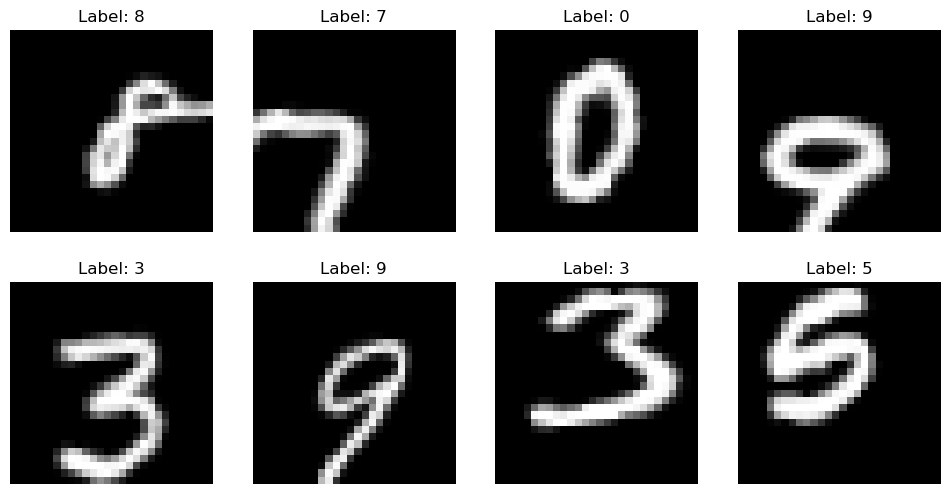

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a batch of augmented images 
augmented_images = datagen.flow(x_train, y_train, batch_size=8)

# Get one batch (8 images)
batch = augmented_images.next()

# Visualize the images in this batch
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    ax.imshow(batch[0][i], cmap='gray')  
    ax.set_title(f"Label: {batch[1][i]}")
    ax.axis('off')  # Hide the axis

plt.show()


> When you're passing `datagen.flow(...)` to the `fit` method, you don’t need to specify the batch_size again in `cnn_model_minist.fit(...)` because it’s already handled by the `datagen.flow()` function. The model will use the batches generated by the data generator with the specified batch size.


In [ ]:
# training the model with data augmentation
cnn_model_minist_augmented_history = cnn_model_minist.fit(
    # ✨ Use the data generator to augment the training data on-the-fly
    datagen.flow(x_train, y_train, batch_size=100),
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[
        # Early stopping to prevent overfitting
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        # Model checkpoint to save the best model
        tf.keras.callbacks.ModelCheckpoint('Models/cnn_model_minist_augmented.keras', save_best_only=True, monitor='val_loss'),
    ]
)

Epoch 1/10
600/600 [==============================] - 23s 38ms/step - loss: 0.1357 - accuracy: 0.9582 - val_loss: 0.0516 - val_accuracy: 0.9831
Epoch 2/10
600/600 [==============================] - 25s 42ms/step - loss: 0.1155 - accuracy: 0.9640 - val_loss: 0.0412 - val_accuracy: 0.9849
Epoch 3/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0996 - accuracy: 0.9685 - val_loss: 0.0366 - val_accuracy: 0.9879
Epoch 4/10
600/600 [==============================] - 24s 41ms/step - loss: 0.0936 - accuracy: 0.9701 - val_loss: 0.0341 - val_accuracy: 0.9883
Epoch 5/10
600/600 [==============================] - 24s 40ms/step - loss: 0.0860 - accuracy: 0.9733 - val_loss: 0.0293 - val_accuracy: 0.9896
Epoch 6/10
600/600 [==============================] - 27s 45ms/step - loss: 0.0813 - accuracy: 0.9735 - val_loss: 0.0314 - val_accuracy: 0.9885
Epoch 7/10
600/600 [==============================] - 24s 39ms/step - loss: 0.0761 - accuracy: 0.9764 - val_loss: 0.0285 - val_accuracy:

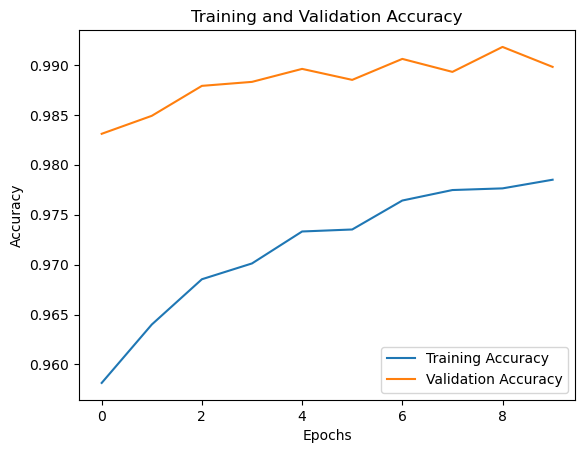

In [55]:
# plot the training and validation accuracy
plt.plot(cnn_model_minist_augmented_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_model_minist_augmented_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Using a Pretrained model 

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Lambda, Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
import tensorflow.keras.backend as K

# Define the Sequential model
model_vgg = Sequential()

# Step 1: Input layer for raw MNIST data (28x28 grayscale)
# Note: Sequential API requires the first layer to define the input shape directly
model_vgg.add(InputLayer(input_shape=(28, 28, 1)))

# Step 2: Convert grayscale to RGB by repeating the channel 3 times (28, 28, 3)
model_vgg.add(Lambda(lambda x: K.repeat_elements(x, 3, axis=-1)))

# Step 3: Resize the input images to 224x224 (required for VGG16)
model_vgg.add(Lambda(lambda x: tf.image.resize(x, (224, 224))))

# Step 4: Load the VGG16 model without the top layer (fully connected layers)
# VGG16 is a pretrained model for RGB images, so we use include_top=False to exclude the classifier part
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add the VGG16 base model to the Sequential model
model_vgg.add(base_model)

# Freeze the base model layers (we don't want to train the VGG part)
base_model.trainable = False

# Step 5: Add a Global Average Pooling layer (to flatten the output of VGG16)
model_vgg.add(GlobalAveragePooling2D())

# Step 6: Add a fully connected layer (Dense layer) for classification
model_vgg.add(Dense(256, activation='relu'))

# Step 7: Add the final output layer for 10 MNIST classes
model_vgg.add(Dense(10, activation='softmax'))  # 10 classes for MNIST

# Compile the model
model_vgg.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model_vgg.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_4 (Lambda)           (None, 28, 28, 3)         0         
                                                                 
 lambda_5 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 10)                2570      
                                                      

In [76]:
# This conifguration isn't the optimal, I used it for speed 
model_vgg_history = model_vgg.fit(
    x_train[:100], y_train[:100], # Use a smaller subset for faster training
    batch_size=50,
    epochs=10,
    validation_data=(x_test[:10], y_test[:10]), # Use a smaller validation set
    callbacks=[
        # Early stopping to prevent overfitting
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        # Model checkpoint to save the best model
        tf.keras.callbacks.ModelCheckpoint('Models/cnn_model_vgg_minist.keras', save_best_only=True, monitor='val_loss'),
    ]
)

Epoch 1/10
2/2 [==============================] - 16s 9s/step - loss: 2.5159 - accuracy: 0.0300 - val_loss: 2.4007 - val_accuracy: 0.1000
Epoch 2/10
2/2 [==============================] - 13s 8s/step - loss: 2.3004 - accuracy: 0.1300 - val_loss: 2.3113 - val_accuracy: 0.3000
Epoch 3/10
2/2 [==============================] - 14s 8s/step - loss: 2.2211 - accuracy: 0.2500 - val_loss: 2.2801 - val_accuracy: 0.2000
Epoch 4/10
2/2 [==============================] - 14s 8s/step - loss: 2.2057 - accuracy: 0.2100 - val_loss: 2.2485 - val_accuracy: 0.3000
Epoch 5/10
2/2 [==============================] - 14s 8s/step - loss: 2.1792 - accuracy: 0.1900 - val_loss: 2.2265 - val_accuracy: 0.2000
Epoch 6/10
2/2 [==============================] - 15s 9s/step - loss: 2.1368 - accuracy: 0.1700 - val_loss: 2.2108 - val_accuracy: 0.2000
Epoch 7/10
2/2 [==============================] - 14s 8s/step - loss: 2.0990 - accuracy: 0.2600 - val_loss: 2.1955 - val_accuracy: 0.3000
Epoch 8/10
2/2 [==================

# Using a Pretrained model directly on any image 

In [83]:
!curl -L "https://plus.unsplash.com/premium_photo-1677560614396-416d97638016?q=80&w=688&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" -o flower.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
  0 81732    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
100 81732  100 81732    0     0  35450      0  0:00:02  0:00:02 --:--:-- 35458


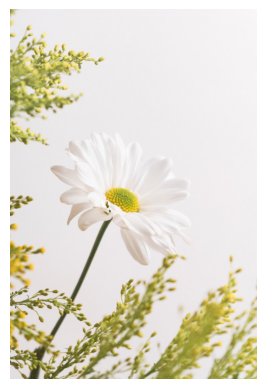

In [84]:
# load the image and plot it 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the image
img = mpimg.imread('flower.jpg')
# Display the image
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()


1/1 [==============================] - 0s 370ms/step
Prediction 1: daisy (0.91)
Prediction 2: bee (0.00)
Prediction 3: ant (0.00)


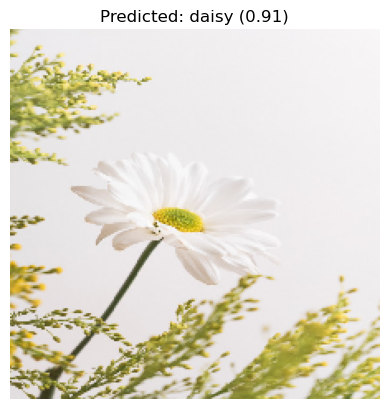

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
img_path = 'flower.jpg'
# Load the image with target size 224x224 (VGG16 input size)
img = image.load_img(img_path, target_size=(224, 224))
# Convert the image to a numpy array and preprocess it 
# Note: VGG16 expects input in the format (batch_size, height, width, channels)
# Expand dimensions to create a batch of size 1
img_array = preprocess_input(np.expand_dims(image.img_to_array(img), axis=0))

# Make predictions
predictions = VGG16().predict(img_array)

# Decode and display predictions
# top=3 means we want the top 3 predictions
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"Prediction {i+1}: {label} ({score:.2f})")

# Visualize the predictions
plt.imshow(img)
# daisy is a type of flower
plt.title(f"Predicted: {decoded_predictions[0][1]} ({decoded_predictions[0][2]:.2f})")
plt.axis('off')
plt.show()


# Practice 🔥 

> Implement a Gradio-based web application that accepts an image input from the user and uses a [pretrained model](https://keras.io/api/applications/) from TensorFlow Keras for image classification. Choose an appropriate model from the available pretrained architectures (e.g., VGG16, ResNet50, MobileNet, etc.), considering the trade-offs between model size, speed, and accuracy based on your use case. 
> 
> Additionally, incorporate a thresholding mechanism to evaluate the model’s confidence score. If the model's top-1 predicted class does not belong to the standard ImageNet categories (which the model is trained on), the probability (confidence score) will be lower, indicating that the image does not belong to any recognized class. In this case, flag the image as belonging to an "unsupported class" or "uncertain classification." This can be achieved by comparing the maximum probability score with a defined threshold value.


* You can do this [mini-course](https://www.kaggle.com/learn/computer-vision) from Kaggle.